In [29]:
# import packages

# import clevercsv as csv
import re
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import pandas_profiling as pdp
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import csv
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

In [30]:
plt.style.use('dark_background')
pio.templates.default = "plotly_dark"

In [31]:
col_names= ['JOBID', 'ACCOUNT', 'USER', 'REQMEM', 'USEDMEM', 'REQTIME', 'USEDTIME',
       'NODES', 'CPUS', 'PARTITION', 'EXITCODE', 'STATE', 'NODE1','NODE2','NODE3','NODE4','NODE5','NODE6']
accre_df = pd.read_csv('accre-jobs-2020.csv', names=col_names) 


C:\Users\matth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
accre_df.shape

(3816291, 18)

In [5]:
accre_report = pdp.ProfileReport(accre_df, title='Pandas Profiling Report')

accre_report

In [33]:
accre_df = accre_df[1:]

In [34]:
accre_df.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODE1,NODE2,NODE3,NODE4,NODE5,NODE6
1,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,NaN,NaN,NaN,NaN,NaN
2,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,NaN,NaN,NaN,NaN,NaN
3,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,NaN,NaN,NaN,NaN,NaN
4,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,NaN,NaN,NaN,NaN,NaN
5,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,NaN,NaN,NaN,NaN,NaN


In [35]:
# change cpu cores to float
accre_df['CPUS']= accre_df['CPUS'].astype(str).astype(float)

In [36]:
# chang nodes to float
accre_df['NODES']= accre_df['NODES'].astype(str).astype(float)

In [37]:
# remove columns
clean_accre_df = accre_df.drop(["JOBID","USER","REQTIME",
                                "USEDTIME","EXITCODE","PARTITION",
                               "NODE1","NODE2","NODE3","NODE4","NODE5","NODE6"], axis =1) # axis = 1 so that it works across our columns
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,NODES,CPUS,STATE
1,treviso,122880Mn,65973.49M,1.0,24.0,COMPLETED
2,treviso,122880Mn,67181.12M,1.0,24.0,COMPLETED
3,treviso,122880Mn,69111.86M,1.0,24.0,COMPLETED
4,treviso,122880Mn,65317.33M,1.0,24.0,COMPLETED
5,treviso,122880Mn,65876.11M,1.0,24.0,COMPLETED


In [38]:
#new column is for requested memory per node
clean_accre_df['RMPN'] = clean_accre_df['REQMEM'].str.extract('(.*)Mn$')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,NODES,CPUS,STATE,RMPN
1,treviso,122880Mn,65973.49M,1.0,24.0,COMPLETED,122880
2,treviso,122880Mn,67181.12M,1.0,24.0,COMPLETED,122880
3,treviso,122880Mn,69111.86M,1.0,24.0,COMPLETED,122880
4,treviso,122880Mn,65317.33M,1.0,24.0,COMPLETED,122880
5,treviso,122880Mn,65876.11M,1.0,24.0,COMPLETED,122880


In [39]:
#new column is for requested memory per core
clean_accre_df['RMPC'] = clean_accre_df['REQMEM'].str.extract('(.*)Mc$')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,NODES,CPUS,STATE,RMPN,RMPC
1,treviso,122880Mn,65973.49M,1.0,24.0,COMPLETED,122880,NaN
2,treviso,122880Mn,67181.12M,1.0,24.0,COMPLETED,122880,NaN
3,treviso,122880Mn,69111.86M,1.0,24.0,COMPLETED,122880,NaN
4,treviso,122880Mn,65317.33M,1.0,24.0,COMPLETED,122880,NaN
5,treviso,122880Mn,65876.11M,1.0,24.0,COMPLETED,122880,NaN


In [14]:
clean_accre_df['RMPC'].fillna('0').head()

1    0
2    0
3    0
4    0
5    0
Name: RMPC, dtype: object

In [15]:
clean_accre_df['RMPN'].fillna('0').head()

1    122880
2    122880
3    122880
4    122880
5    122880
Name: RMPN, dtype: object

In [40]:
# change RMPC colum to fill with na with 0
clean_accre_df['RMPC'] = clean_accre_df['RMPC'].fillna('0')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,NODES,CPUS,STATE,RMPN,RMPC
1,treviso,122880Mn,65973.49M,1.0,24.0,COMPLETED,122880,0
2,treviso,122880Mn,67181.12M,1.0,24.0,COMPLETED,122880,0
3,treviso,122880Mn,69111.86M,1.0,24.0,COMPLETED,122880,0
4,treviso,122880Mn,65317.33M,1.0,24.0,COMPLETED,122880,0
5,treviso,122880Mn,65876.11M,1.0,24.0,COMPLETED,122880,0


In [42]:
# Change RMPN column to fill na with 0
clean_accre_df['RMPN'] = clean_accre_df['RMPN'].fillna('0')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,NODES,CPUS,STATE,RMPN,RMPC
1,treviso,122880Mn,65973.49M,1.0,24.0,COMPLETED,122880,0
2,treviso,122880Mn,67181.12M,1.0,24.0,COMPLETED,122880,0
3,treviso,122880Mn,69111.86M,1.0,24.0,COMPLETED,122880,0
4,treviso,122880Mn,65317.33M,1.0,24.0,COMPLETED,122880,0
5,treviso,122880Mn,65876.11M,1.0,24.0,COMPLETED,122880,0


In [43]:
clean_accre_df['RMPC']= clean_accre_df['RMPC'].astype(str).astype(float)

In [44]:
clean_accre_df['RMPN']= clean_accre_df['RMPN'].astype(str).astype(float)

In [45]:
# clean the USEDMEM column
#new column is for requested memory per core
clean_accre_df['UM'] = clean_accre_df['USEDMEM'].str.extract('(.*)M$')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,NODES,CPUS,STATE,RMPN,RMPC,UM
1,treviso,122880Mn,65973.49M,1.0,24.0,COMPLETED,122880.0,0.0,65973.49
2,treviso,122880Mn,67181.12M,1.0,24.0,COMPLETED,122880.0,0.0,67181.12
3,treviso,122880Mn,69111.86M,1.0,24.0,COMPLETED,122880.0,0.0,69111.86
4,treviso,122880Mn,65317.33M,1.0,24.0,COMPLETED,122880.0,0.0,65317.33
5,treviso,122880Mn,65876.11M,1.0,24.0,COMPLETED,122880.0,0.0,65876.11


In [46]:
# what do I fill the na with? 
clean_accre_df['UM'] = clean_accre_df['UM'].fillna('3227.633')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,NODES,CPUS,STATE,RMPN,RMPC,UM
1,treviso,122880Mn,65973.49M,1.0,24.0,COMPLETED,122880.0,0.0,65973.49
2,treviso,122880Mn,67181.12M,1.0,24.0,COMPLETED,122880.0,0.0,67181.12
3,treviso,122880Mn,69111.86M,1.0,24.0,COMPLETED,122880.0,0.0,69111.86
4,treviso,122880Mn,65317.33M,1.0,24.0,COMPLETED,122880.0,0.0,65317.33
5,treviso,122880Mn,65876.11M,1.0,24.0,COMPLETED,122880.0,0.0,65876.11


In [47]:
clean_accre_df['UM']= clean_accre_df['UM'].astype(str).astype(float)

In [48]:
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,NODES,CPUS,STATE,RMPN,RMPC,UM
1,treviso,122880Mn,65973.49M,1.0,24.0,COMPLETED,122880.0,0.0,65973.49
2,treviso,122880Mn,67181.12M,1.0,24.0,COMPLETED,122880.0,0.0,67181.12
3,treviso,122880Mn,69111.86M,1.0,24.0,COMPLETED,122880.0,0.0,69111.86
4,treviso,122880Mn,65317.33M,1.0,24.0,COMPLETED,122880.0,0.0,65317.33
5,treviso,122880Mn,65876.11M,1.0,24.0,COMPLETED,122880.0,0.0,65876.11


In [49]:
clean_accre_df['UM'].describe()


count    3.816290e+06
mean     3.737245e+03
std      7.853432e+03
min      0.000000e+00
25%      2.951200e+02
50%      1.698150e+03
75%      3.227633e+03
max      3.116446e+05
Name: UM, dtype: float64

In [50]:
test_state = clean_accre_df[(clean_accre_df["STATE"] == 'COMPLETED')]

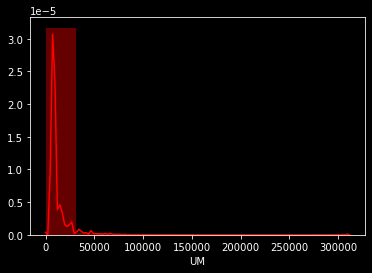

In [51]:
sns.distplot(test_state.UM, bins=10, kde=True, color="red");

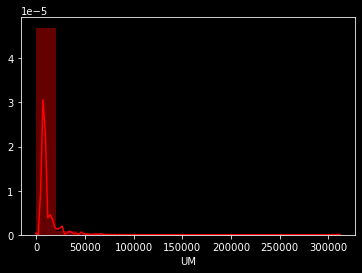

In [55]:
sns.distplot(clean_accre_df.UM, bins=15, kde=True, color="red");

In [ ]:
# new column will divide cpu by node
clean_accre_df['CPUPERNODE']= cpu / node

In [ ]:
# gdp_pivoted = gdp_df.pivot_table(['Years', 'GDP'], 'Country')
caccre_df_pivot = clean_accre_df.pivot_table(values=['CPUS','RMPN','RMPC','UM'], index="ACCOUNT", columns=['Years'])[[1990, 2017]]

In [ ]:
# what is per core??? assume you multiply cpus by node this column will be RMPN times CPUS
clean_accre_df['RMPNEW'] =

In [ ]:
# what is per core??? update RMPC to add the RMPNEW column
clean_accre_df['RMPC'] =

In [ ]:
# multiply CPUS by UM
clean_accre_df['UM'] =

In [65]:
clean_accre_df['STATE'].unique()

array(['COMPLETED', 'CANCELLED', 'FAILED', 'OUT_OF_MEMORY',
       'CANCELLED by 782611', 'CANCELLED by 791651', 'CANCELLED by 9206',
       'CANCELLED by 785271', 'CANCELLED by 666860',
       'CANCELLED by 686562', 'CANCELLED by 397600',
       'CANCELLED by 199066', 'CANCELLED by 503585',
       'CANCELLED by 505355', 'TIMEOUT', 'CANCELLED by 486541',
       'CANCELLED by 763605', 'CANCELLED by 124006', 'CANCELLED by 90423',
       'CANCELLED by 200557', 'CANCELLED by 649319',
       'CANCELLED by 483348', 'CANCELLED by 855431',
       'CANCELLED by 199766', 'CANCELLED by 337422', 'CANCELLED by 0',
       'CANCELLED by 546080', 'CANCELLED by 693461',
       'CANCELLED by 782535', 'CANCELLED by 515423',
       'CANCELLED by 454080', 'CANCELLED by 9201', 'CANCELLED by 649321',
       'CANCELLED by 9202', 'CANCELLED by 895426', 'CANCELLED by 651701',
       'CANCELLED by 781109', 'RUNNING'], dtype=object)

In [66]:
test_state = clean_accre_df[(clean_accre_df["STATE"] == 'FAILED')]
test_state.head()

,ACCOUNT,REQMEM,USEDMEM,NODES,CPUS,STATE,RMPN,RMPC,UM
8630,cms,186648Mn,1.78M,1.0,0.0,FAILED,186648.0,0.0,1.78
8633,cms,186648Mn,8.38M,1.0,0.0,FAILED,186648.0,0.0,8.38
22235,cms,21875Mn,11310.72M,1.0,8.0,FAILED,21875.0,0.0,11310.72
56717,blueberries,4096Mn,1968.02M,1.0,1.0,FAILED,4096.0,0.0,1968.02
68662,cubanelle,1024Mc,73.32M,1.0,1.0,FAILED,0.0,1024.0,73.32


In [67]:
test_state.groupby('ACCOUNT')['STATE'].count().sort_values(ascending=False)

ACCOUNT
turban         443
basil          245
cep            127
plantain       105
tips            65
cms             61
sommerfeld      47
carrot          29
bertanne        27
pasilla         27
blueberries     25
crowns          20
crab            13
wood            12
pinole          11
seeded          11
cubanelle       11
cepuna          10
mignonette      10
virginia        10
poblano          9
peanuts          9
angelys          9
alkmene          7
sprite           6
lemon            4
concord          4
bulk             4
cactus           4
savoy            4
horseradish      4
opo              4
forelle          3
scallopini       3
gem              2
almonds          2
cms_gpu_acc      2
tosca            2
anise            2
packham          2
sunburst         1
grisette         1
sharlin          1
orange           1
burro            1
enoki            1
retailer         1
mixed            1
pearl            1
cms_lowprio      1
clara            1
Name: STATE, dtype: int

In [54]:
clean_accre_df.isnull().sum()
# 20 percent is 0?

ACCOUNT         0
REQMEM          0
USEDMEM         0
NODES           0
CPUS            0
STATE           0
RMPN            0
RMPC            0
UM         602577
dtype: int64

In [61]:
test_usedm = clean_accre_df[(clean_accre_df["USEDMEM"] == '0')]
test_usedm.head()

,ACCOUNT,REQMEM,USEDMEM,NODES,CPUS,STATE,RMPN,RMPC,UM
4806,endive,8192Mn,0,1.0,1.0,COMPLETED,8192.0,0.0,NaN
4807,endive,8192Mn,0,1.0,1.0,COMPLETED,8192.0,0.0,NaN
4808,endive,8192Mn,0,1.0,1.0,COMPLETED,8192.0,0.0,NaN
4810,endive,8192Mn,0,1.0,1.0,COMPLETED,8192.0,0.0,NaN
4811,endive,8192Mn,0,1.0,1.0,COMPLETED,8192.0,0.0,NaN


In [68]:
test_usedm['CPUS'].unique()

array([ 1.,  8., 32., 16., 64.,  4., 12.,  2.,  3.,  5., 10., 20.,  7.,
        6., 11., 24.,  9., 18., 14., 15., 13., 22.])

In [69]:
test_usedm['NODES'].unique()

array([  1.,  30.,  19.,  13.,   2.,   4.,   3.,  10.,  40.,   5.,   8.,
        15.,  24.,  35.,  48.,  25.,  64., 121.,  80.,  63.,  12.,  23.,
       120.,  55.,  28.,  67.,  59.,  50.,  16.,  18.,   6.,  20.])

In [62]:
test_usedm['USEDMEM'].value_counts()

0    602577
Name: USEDMEM, dtype: int64

In [64]:
test_usedm.groupby('ACCOUNT')['USEDMEM'].count().sort_values(ascending=False)

ACCOUNT
cep              144162
orange            81486
cms               77403
boysenberries     29665
bulk              29444
                  ...  
hass                  1
pearl                 1
francis               1
romanesco             1
crowns                1
Name: USEDMEM, Length: 156, dtype: int64

In [ ]:
test_usedm.pivot_table(['USEDMEM'], 'ACCOUNT')

In [50]:
clean_accre_df.pivot_table(['RMPN', 'RMPC'], 'ACCOUNT')

,RMPC,RMPN
ACCOUNT,,
alkmene,0.334487,8682.212354
almonds,1394.394500,6634.610259
amaranth,0.000000,8192.000000
angelys,1010.614379,71.389978
anise,549.787606,29053.755493
...,...,...
white,0.000000,4184.191388
winged,0.000000,5675.447825
with,0.000000,2048.000000


In [ ]:
# convert Mn to Mc


In [ ]:
# convert used Mem to core

In [145]:
clean_accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816290 entries, 1 to 3816290
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   ACCOUNT  object 
 1   REQMEM   object 
 2   USEDMEM  object 
 3   NODES    float64
 4   CPUS     float64
 5   STATE    object 
 6   RMPN     object 
dtypes: float64(2), object(5)
memory usage: 203.8+ MB


In [80]:
accre_df.groupby(['CPUS']).size().sort_values(ascending=True)
accre_df

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODE1,NODE2,NODE3,NODE4,NODE5,NODE6
1,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24.0,production,0:0,COMPLETED,cn1531,NaN,NaN,NaN,NaN,NaN
2,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24.0,production,0:0,COMPLETED,cn1441,NaN,NaN,NaN,NaN,NaN
3,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24.0,production,0:0,COMPLETED,cn1464,NaN,NaN,NaN,NaN,NaN
4,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24.0,production,0:0,COMPLETED,cn1473,NaN,NaN,NaN,NaN,NaN
5,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24.0,production,0:0,COMPLETED,cn1440,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816286,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2.0,production,0:0,COMPLETED,cn312,NaN,NaN,NaN,NaN,NaN
3816287,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2.0,production,0:0,COMPLETED,cn312,NaN,NaN,NaN,NaN,NaN
3816288,24173815_10,portabella,vennie,32768Mn,21207.96M,1-00:00:00,00:01:40,1,2.0,production,0:0,COMPLETED,cn368,NaN,NaN,NaN,NaN,NaN
3816289,24173817,boysenberries,hortensia,100000Mn,0,1-00:00:00,00:03:05,1,8.0,production,0:0,RUNNING,cn1509,NaN,NaN,NaN,NaN,NaN


In [71]:
accre_df['NODES'].unique()

array(['NODES', '1', '4', '2', '3', 1, 5, 38, 30, 25, 21, 13, 19, 23, 2,
       3, 4, 12, 51, 37, 75, 126, 11, 10, 20, 40, 41, 97, 45, 6, 63, 8,
       143, 15, 24, 35, 48, 80, 99, 120, 64, 121, 39, 55, 9, 66, 27, 17,
       28, 53, 34, 70, 67, 59, 77, 58, 43, 31, 61, 52, 50, 16, 26, 22, 14,
       112, 7, 95, 109, 100, 149, 146, 114, 94, 87, 140, 142, 44, 156,
       163, 62, 129, 68, 200, 400, 500, 18, 93], dtype=object)

In [72]:
accre_df['CPUS'].unique()

array(['CPUS', '24', '1', '16', '7', '4', '12', '2', '5', '8', '11', '6',
       '3', '9', '32', '64', '0', '10', 1, 12, 16, 8, 32, 4, 10, 2, 3, 5,
       7, 6, 11, 64, 9, 20, 24, 15, 14, 13, 18, 22, 0, 19], dtype=object)

In [78]:
# split where ends with c and m

In [ ]:
# replace mn and mc with nothing

In [ ]:
#aggreaget columns


In [73]:
accre_df = ['NODES'].astype(str).str.isdigit()

AttributeError: 'list' object has no attribute 'astype'

In [ ]:
accre_df = ['CPUS'].astype(str).str.isdigit()

In [ ]:
clean_accre_df.groupby('ACCOUNT').mean()

In [60]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816291 entries, 0 to 3816290
Data columns (total 18 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   ACCOUNT    object
 2   USER       object
 3   REQMEM     object
 4   USEDMEM    object
 5   REQTIME    object
 6   USEDTIME   object
 7   NODES      object
 8   CPUS       object
 9   PARTITION  object
 10  EXITCODE   object
 11  STATE      object
 12  NODE1      object
 13  NODE2      object
 14  NODE3      object
 15  NODE4      object
 16  NODE5      object
 17  NODE6      object
dtypes: object(18)
memory usage: 524.1+ MB


In [64]:
x = "122880Mn"
x.replace("Mn","")

'122880'

In [63]:
clean_accre_df['REQMEM'] = accre_df['REQMEM'].replace("Mn","")
clean_accre_df['REQMEM'].head()

0      REQMEM
1    122880Mn
2    122880Mn
3    122880Mn
4    122880Mn
Name: REQMEM, dtype: object

In [65]:
clean_accre_df.groupby('ACCOUNT').mean()

DataError: No numeric types to aggregate

In [32]:
accre_df["ACCOUNT"].value_counts()

cms          807408
cep          609278
summer       380788
galia        198180
carrot       192524
              ...  
purple            1
discovery         1
crowns            1
hass              1
flamingo          1
Name: ACCOUNT, Length: 173, dtype: int64

In [10]:
accre_df['ACCOUNT'].unique()

array(['treviso', 'mickey', 'fava', 'delblush', 'fresh', 'minnewashta',
       'broccoli', 'mangosteen', 'pepino', 'sprite', 'mixed',
       'horseradish', 'galia', 'cepuna', 'conference', 'cantared',
       'harovin', 'turban', 'lychees', 'cep', 'seeded', 'sunburst',
       'wood', 'regal', 'crab', 'blackberries', 'portabella', 'gobo',
       'salustiana', 'cms', 'pasilla', 'cms_lowprio', 'winged', 'bulk',
       'summer', 'baking', 'sharlin', 'carrot', 'endive', 'cmsadmin',
       'peanuts', 'morita', 'water', 'muscat', 'boysenberries', 'concord',
       'bunch', 'cactus', 'large', 'orange', 'anise', 'bon', 'brazilnuts',
       'retailer', 'rosemarie', 'alkmene', 'bibb', 'pioppino', 'dill',
       'clara', 'sweet', 'casaba', 'chickpeas', 'cubanelle',
       'blueberries', 'arra', 'bell', 'enoki', 'carambola', 'pinole',
       'belle', 'fiddlehead', 'long', 'round', 'sunflower', 'grisette',
       'lollo', 'st', 'lemon', 'basil', 'fairchild', 'baby', 'sturmer',
       'texas', 'celery

In [23]:
accre_df['CPUS'].unique()

array([24,  1, 16,  7,  4, 12,  2,  5,  8, 11,  6,  3,  9, 32, 64,  0, 10,
       20, 15, 14, 13, 18, 22, 19], dtype=int64)

In [ ]:
# remove letters and convert to int for memory usage

In [ ]:
# convert mn to mc

In [14]:
# convert memory to per core


In [17]:
# create columns for time and percent comparison 

In [ ]:
# find average percent for each group

In [13]:
# groups are account
accre_df.head(10)
# need account, reqmem,usedmem, nodes, cpus, production

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440
5,16297022,treviso,arabella,122880Mn,65183.02M,13-18:00:00,12-02:31:43,1,24,production,0:0,COMPLETED,cn1443
6,16297024,treviso,arabella,122880Mn,64941.85M,13-18:00:00,13-06:54:59,1,24,production,0:0,COMPLETED,cn1531
7,16316283,treviso,arabella,122880Mn,68499.51M,13-18:00:00,13-18:00:05,1,24,production,0:0,COMPLETED,cn1535
8,16316284,treviso,arabella,122880Mn,67761.41M,13-18:00:00,13-18:00:15,1,24,production,0:0,COMPLETED,cn1464
9,16316324,treviso,arabella,122880Mn,68087.66M,13-18:00:00,13-18:00:06,1,24,production,0:0,COMPLETED,cn1473


# Question 3
What groups are best optimizing their memory usage in terms of percent of actual memory used of the memory requested for a job? What is the average percent for each group?

# Answer 1:
x is the best group for using 

# Answer 2:
The average percent for each group is